## Ensemble Methods for Breast Cancer Prediction



In [9]:
# import packages needed
import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
# from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score
import time
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')
#  set figure size and maximum columns for pandas dataframe display
plt.rcParams['figure.figsize'] = [10,6]
pd.set_option('display.max_columns', 50)


In [10]:
# pip install xgboost

In [11]:
# read dataset
# info about the dataset can be found here:
# https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
# https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
data_path = r"/Users/huigong/Desktop/finnalCode"
df = pd.read_csv(os.path.join(data_path, 'data.csv'))
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
# drop column id, and the last column Unnamed: 32
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# for target variable diagnosis, replace Malignant with 1, and replace Benign with 0
df.diagnosis.replace({'M': 1, 'B': 0}, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df.diagnosis.value_counts().apply(lambda x: f'{x}/{len(df)} = {round(x/len(df)*100, 1)}%')

0    357/569 = 62.7%
1    212/569 = 37.3%
Name: diagnosis, dtype: object

In [15]:
df.shape

(569, 31)

            Target Variable Distribution           


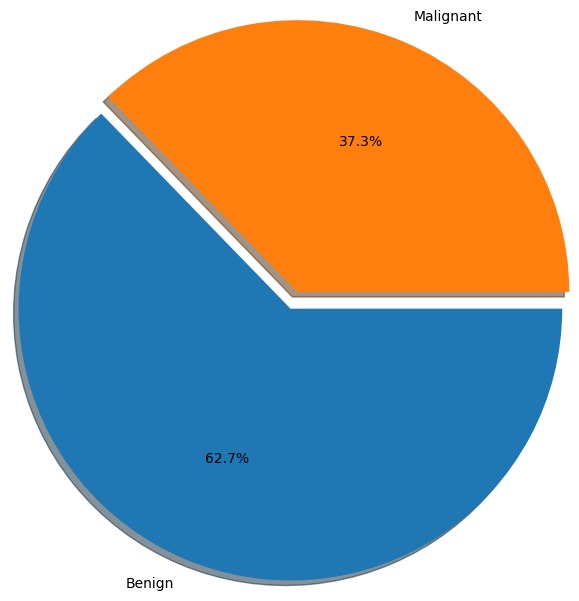

In [16]:
# distribution of target variable - diagnosis
target = 'diagnosis'
labels = ['Benign','Malignant']
features = [i for i in df.columns.values if i not in [target]]
dict_map = {}
for e, i in enumerate(sorted(df[target].unique())):
    dict_map[i]=labels[e]
df1 = df.copy()
df1[target]=df1[target].map(dict_map)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.figure(dpi=100)
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1.5, startangle=0)
plt.show()

In [17]:
# check the number of unique rows in each feature
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 30 numerical & 0 categorical features.


                                                  Features Distribution                                                  


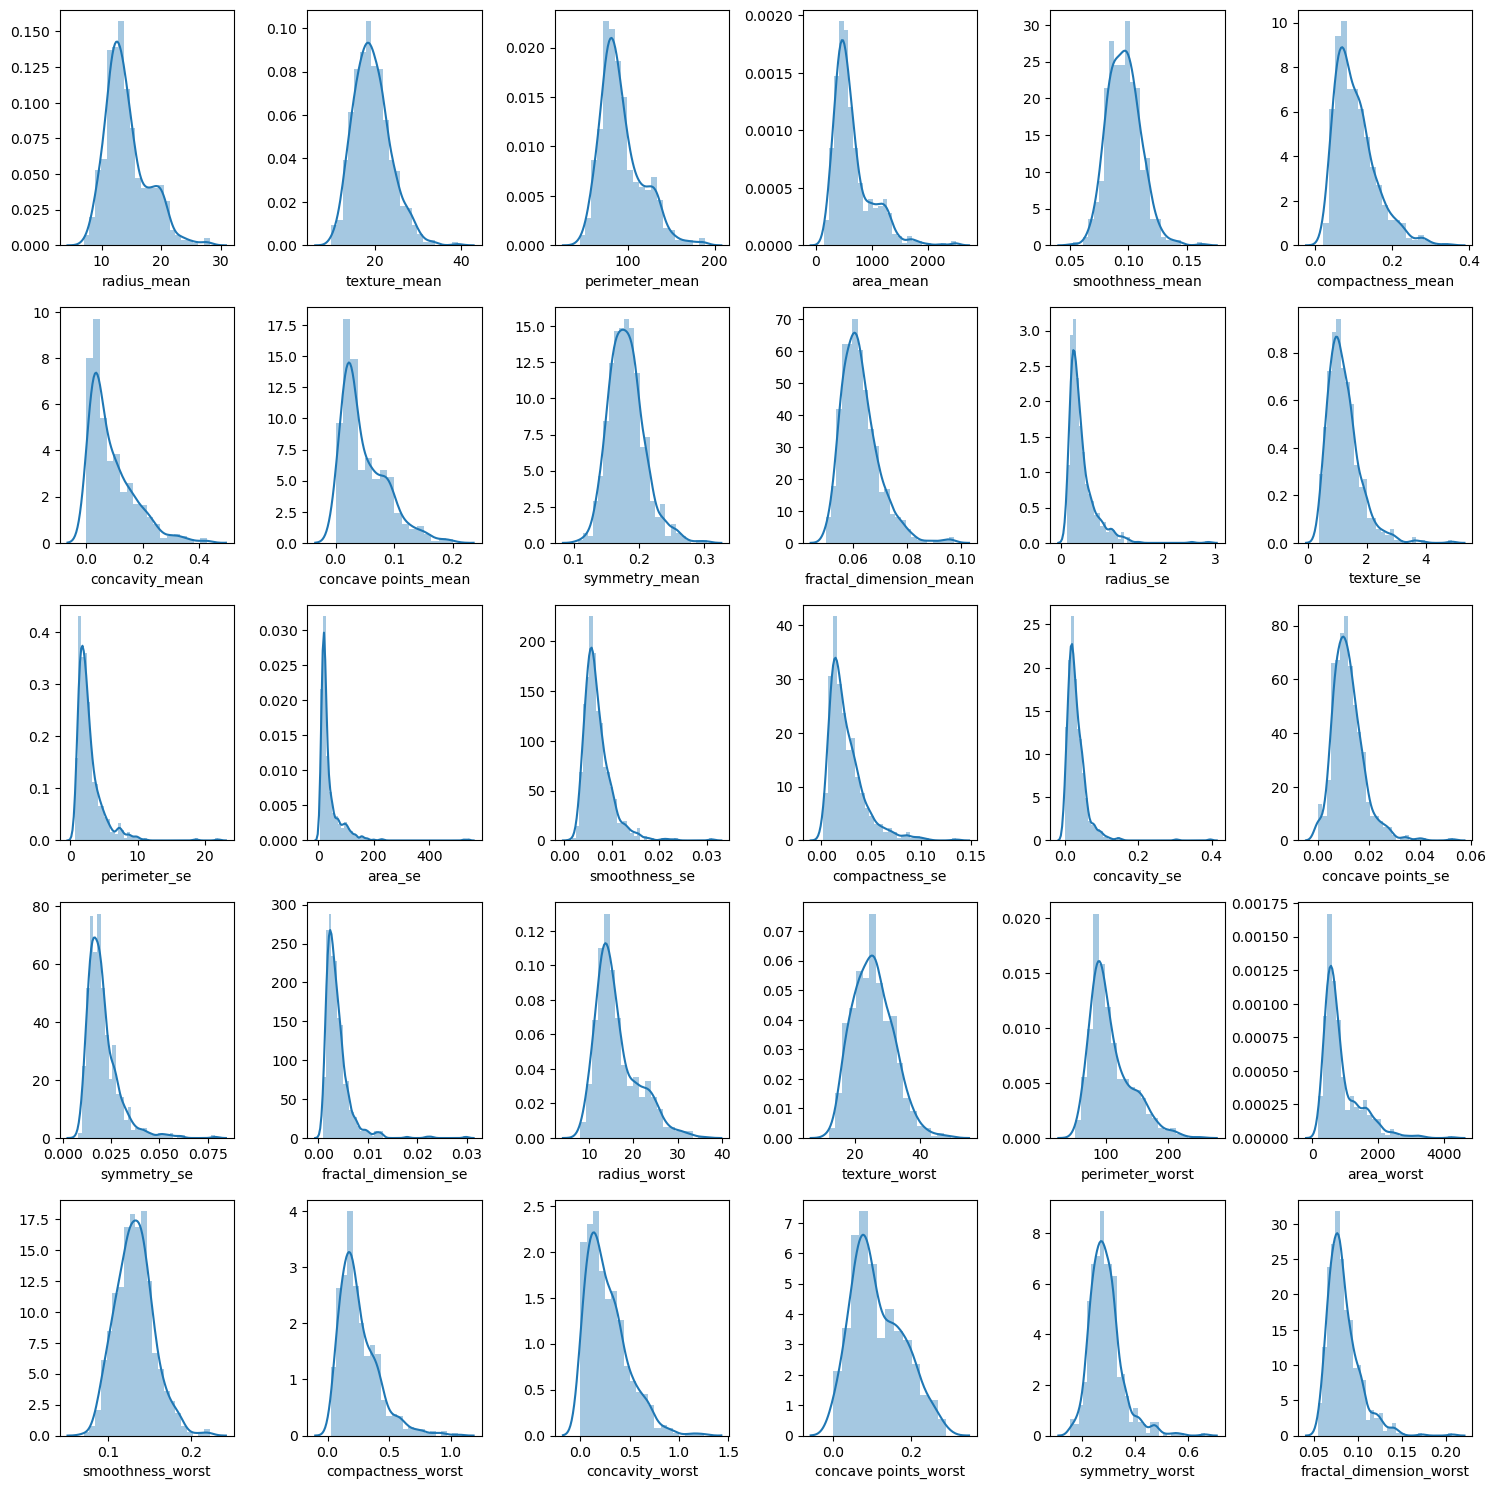

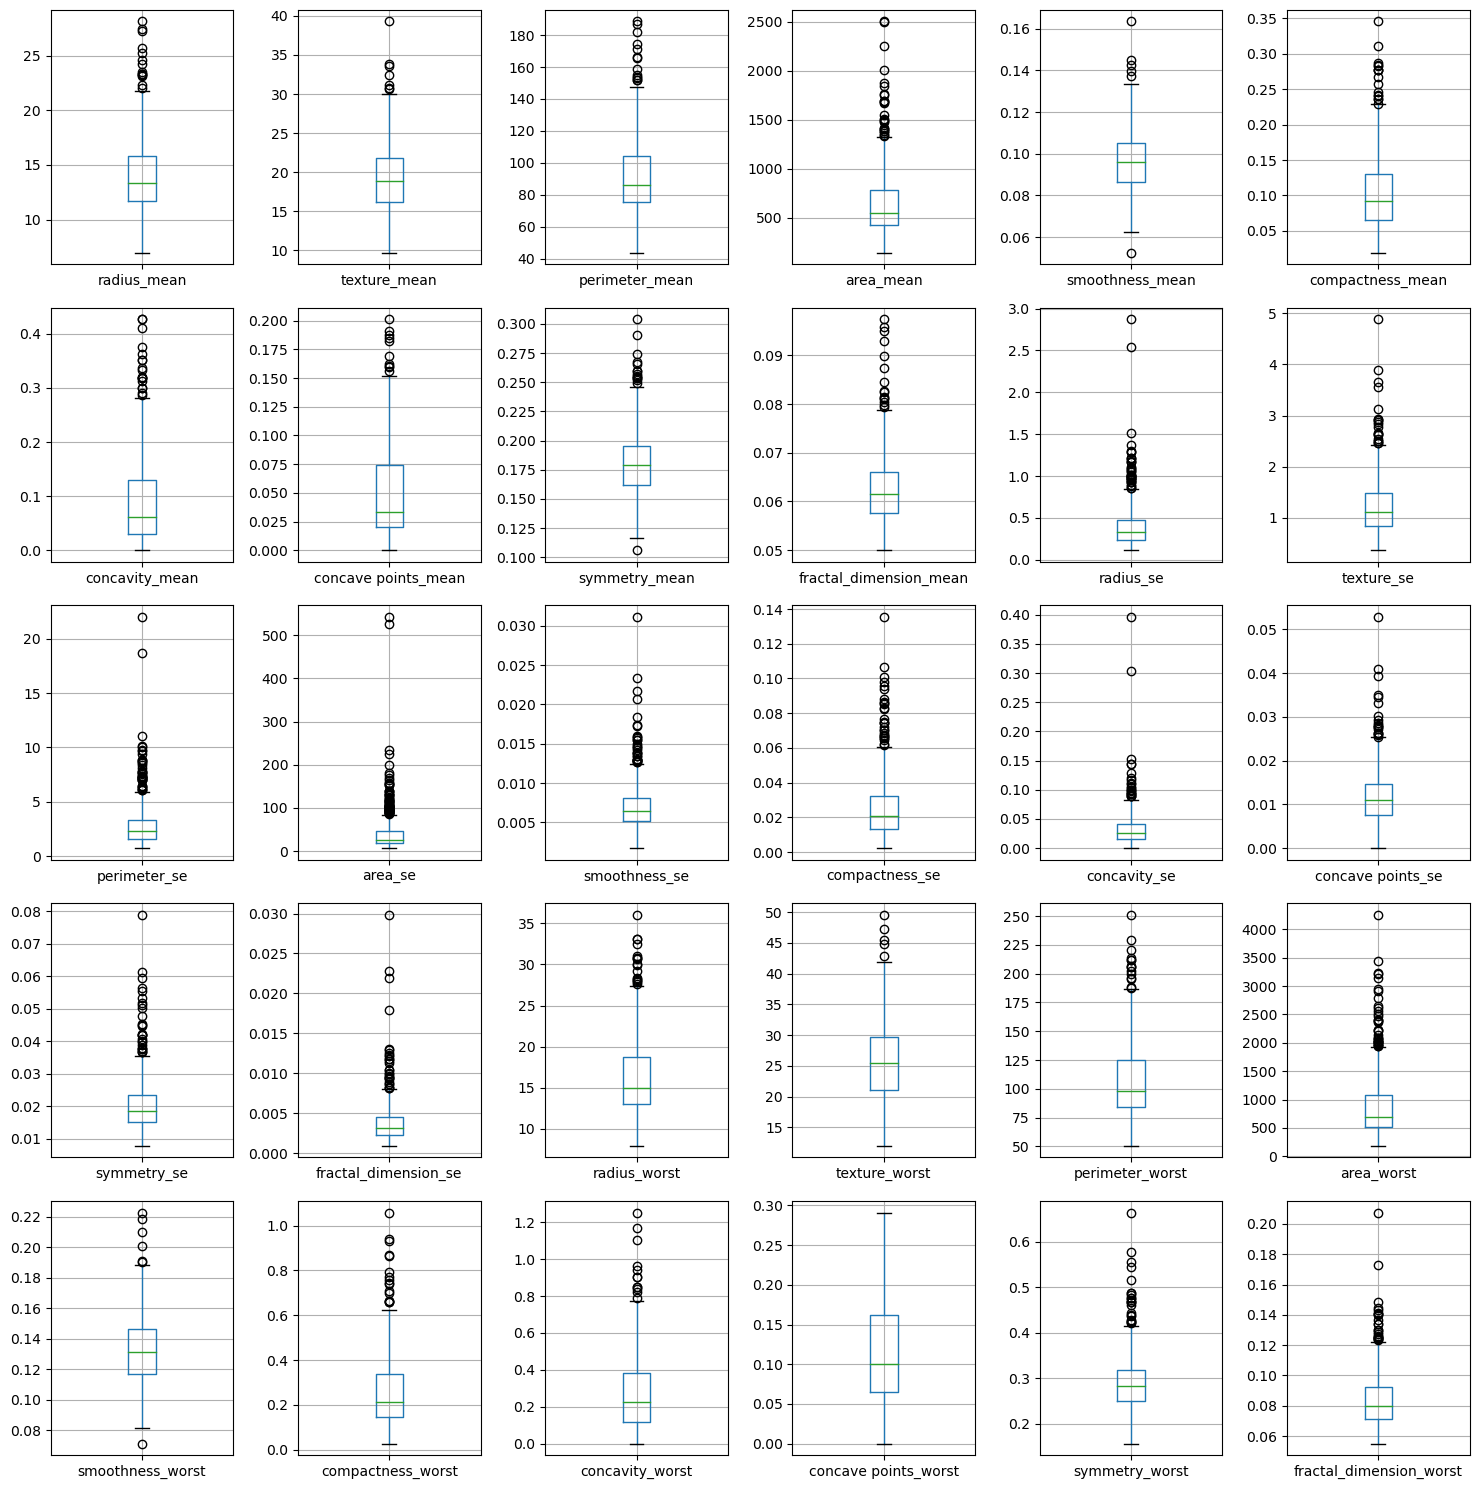

In [18]:
# EDA of the feature set - plot the distribution of each feature
features = [i for i in df.columns.values if i not in [target]]

print('\033[1mFeatures Distribution'.center(125))

n = 6
nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/n)], dpi=100)
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/n)], dpi=100)
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

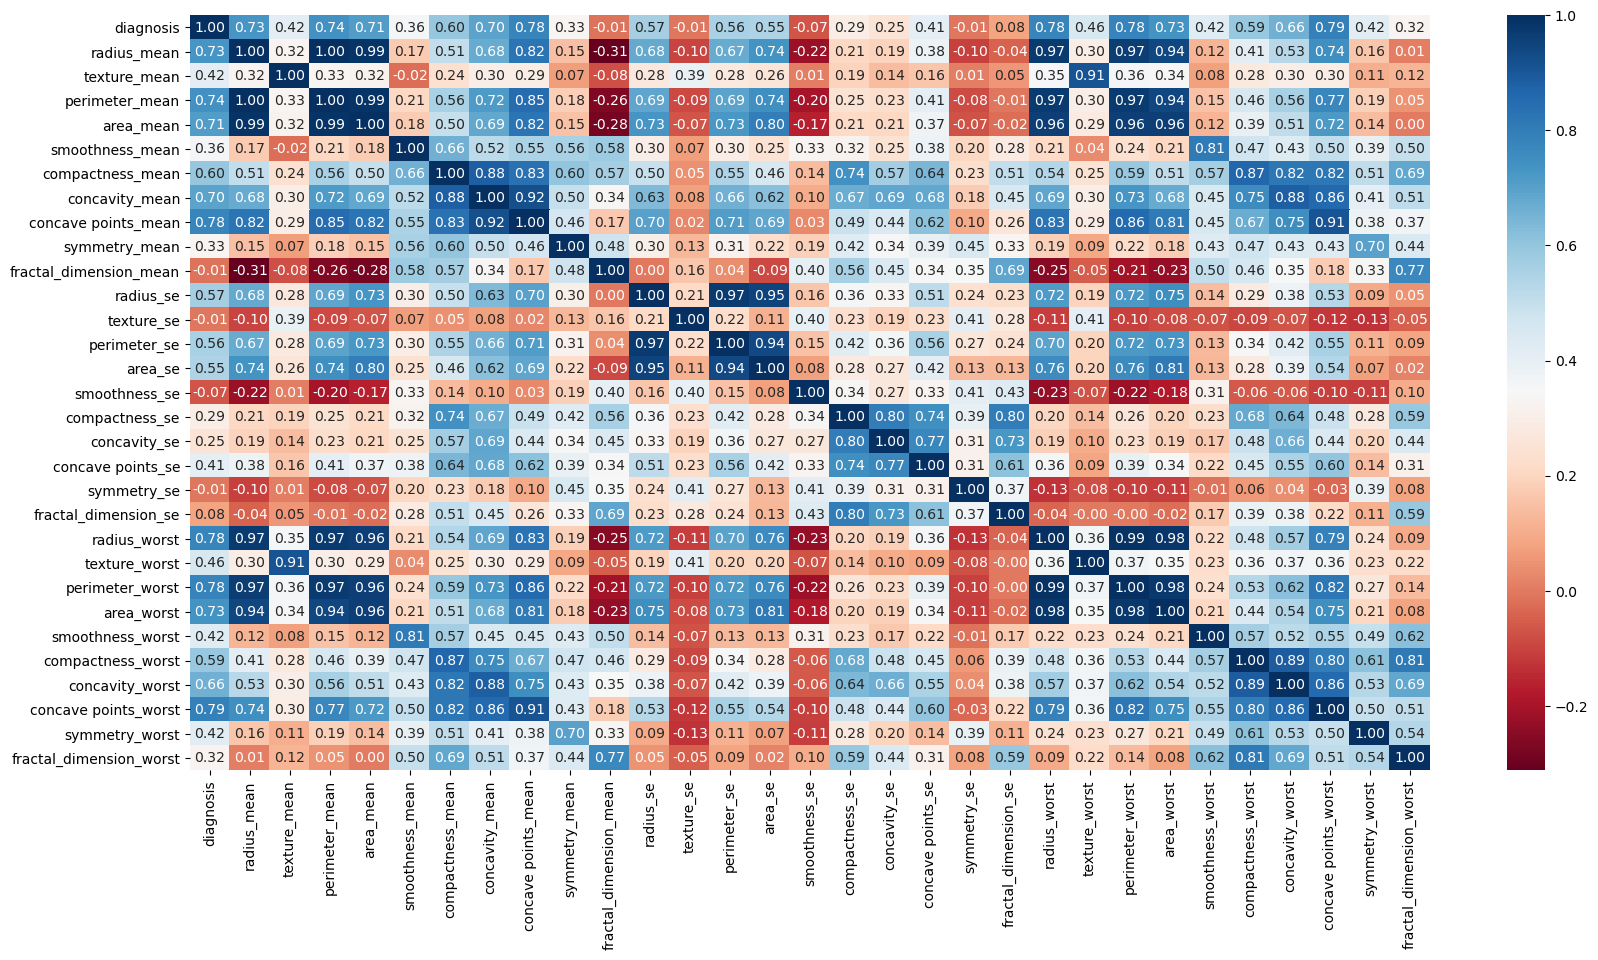

In [19]:
# plot the feature correlation matrix
fig, ax = plt.subplots(figsize=(20, 10), dpi=100)
sns.heatmap(df.corr(), cmap='RdBu', annot=True, fmt=".2f")

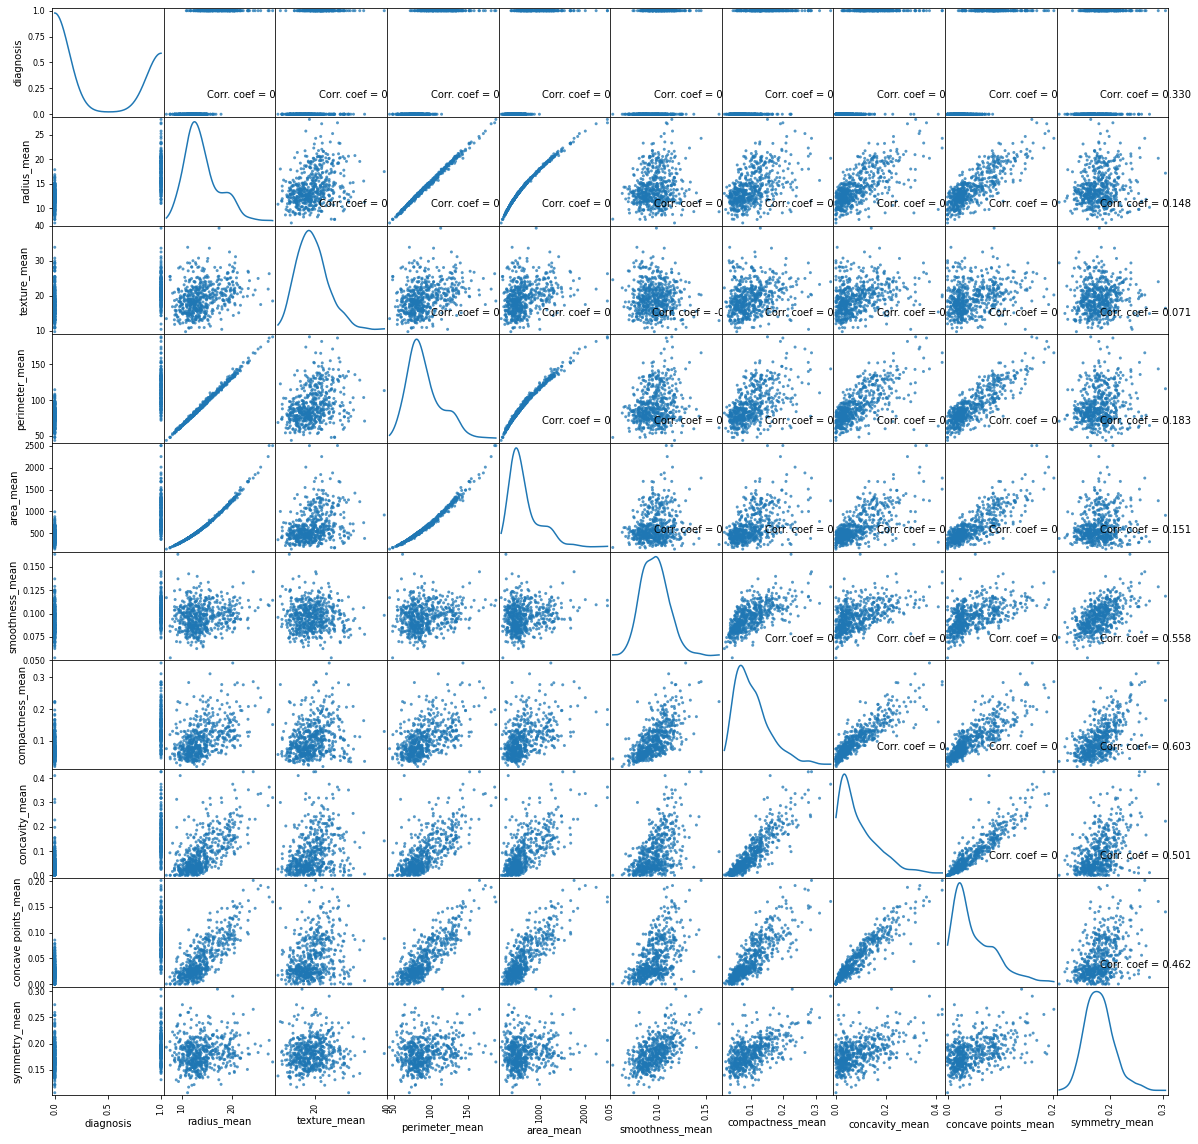

<Figure size 1000x600 with 0 Axes>

In [20]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    plt.figure(dpi=100)
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.show()

plotScatterMatrix(df, 20, 10)

## Data split

In [21]:
X = df.iloc[:, df.columns != 'diagnosis']
y = df.diagnosis
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 1. Bagging - Random Forest

In [22]:
# feature standardization
std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-1.820278e-16,3.693017e-16,4.958183e-16,-1.049222e-16,6.993185e-16,-5.683793e-17,-5.807320e-17,4.001683e-17,5.221708e-17,3.194026e-16,1.820278e-16,-1.093143e-16,-2.840219e-16,1.322507e-16,-1.407299e-16,-3.050063e-17,5.026504e-17,-1.385949e-16,8.723181e-17,-4.087847e-17,-3.872360e-16,2.318048e-16,-2.820698e-16,-8.784182e-18,-1.151704e-16,-9.028187e-17,-4.684897e-17,3.123265e-17,-4.745898e-16,3.342869e-16
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-2.009730e+00,-2.265011e+00,-1.961360e+00,-1.433461e+00,-2.342455e+00,-1.568307e+00,-1.092835e+00,-1.236420e+00,-2.733834e+00,-1.791603e+00,-1.033890e+00,-1.554603e+00,-1.015930e+00,-7.133542e-01,-1.817396e+00,-1.310530e+00,-1.010196e+00,-1.860867e+00,-1.511145e+00,-1.092098e+00,-1.720204e+00,-2.286387e+00,-1.682868e+00,-1.212587e+00,-2.596976e+00,-1.442492e+00,-1.298977e+00,-1.729670e+00,-2.141576e+00,-1.602524e+00
25%,-6.869865e-01,-7.192578e-01,-6.877646e-01,-6.643427e-01,-7.599676e-01,-7.446452e-01,-7.311067e-01,-7.398554e-01,-7.042022e-01,-7.295506e-01,-6.124852e-01,-6.816724e-01,-6.123058e-01,-4.846603e-01,-6.380051e-01,-6.991575e-01,-5.358218e-01,-6.582118e-01,-6.518979e-01,-5.882379e-01,-6.805052e-01,-7.269867e-01,-6.949785e-01,-6.436573e-01,-7.475060e-01,-6.811748e-01,-7.355618e-01,-7.700379e-01,-6.377821e-01,-7.030095e-01
50%,-2.310610e-01,-1.207886e-01,-2.444667e-01,-3.143644e-01,-5.267576e-02,-2.145711e-01,-3.649669e-01,-3.954004e-01,-5.783428e-02,-2.031921e-01,-2.890574e-01,-1.429786e-01,-2.836539e-01,-3.395152e-01,-2.224300e-01,-2.932991e-01,-1.942788e-01,-1.242557e-01,-2.079996e-01,-2.415417e-01,-2.924054e-01,-6.996374e-02,-2.990905e-01,-3.561409e-01,-4.191078e-02,-2.454053e-01,-2.141609e-01,-2.170230e-01,-1.439281e-01,-2.222582e-01
75%,4.947835e-01,5.628428e-01,4.975359e-01,3.775369e-01,6.231343e-01,4.923801e-01,5.271006e-01,6.321626e-01,5.034376e-01,5.249492e-01,2.546464e-01,4.669490e-01,2.225267e-01,8.505718e-02,4.012832e-01,3.818060e-01,2.679480e-01,4.487783e-01,3.105843e-01,2.787879e-01,5.787764e-01,7.072664e-01,5.606441e-01,3.987080e-01,6.189186e-01,5.218523e-01,5.217957e-01,6.980537e-01,4.340876e-01,4.386715e-01
max,3.900239e+00,4.634299e+00,3.899731e+00,5.114742e+00,4.715773e+00,4.485809e+00,4.137033e+00,3.838961e+00,4.435961e+00,4.987148e+00,8.493000e+00,6.646884e+00,8.991216e+00,1.036439e+01,8.499034e+00,4.605403e+00,1.148413e+01,6.542039e+00,7.049767e+00,9.917437e+00,4.021630e+00,3.891934e+00,4.198771e+00,5.782013e+00,3.859114e+00,5.071677e+00,4.611335e+00,2.628551e+00,5.914120e+00,6.798089e+00



                                Standardardization on Testing set                                


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,-0.054148,-0.149115,-0.049899,-0.065009,0.128268,0.046911,-0.023545,-0.012018,-0.060598,0.059351,-0.103577,-0.009305,-0.107106,-0.097285,0.255080,0.043862,-0.019501,0.083834,0.069504,0.054800,-0.083932,-0.187109,-0.087617,-0.085684,0.060766,-0.039886,-0.070165,-0.066117,-0.102098,-0.048919
std,0.924651,1.008734,0.916549,0.879050,0.909057,0.897930,0.877281,0.888395,0.961211,1.067150,0.751980,0.999450,0.729882,0.647296,1.222352,1.083173,0.729829,0.903660,0.976581,1.030858,0.931119,1.045952,0.915005,0.884832,0.856487,0.970756,0.919183,0.917280,0.903596,0.974560
min,-1.791837,-2.006025,-1.794086,-1.329301,-3.033656,-1.257078,-1.092835,-1.236420,-2.346375,-1.831816,-0.954887,-1.551159,-0.916439,-0.661007,-1.280130,-1.225666,-1.010196,-1.860867,-1.177709,-0.983620,-1.511447,-1.825318,-1.500083,-1.118210,-2.014167,-1.270838,-1.298977,-1.729670,-2.003423,-1.474140
25%,-0.715657,-0.862167,-0.718648,-0.684272,-0.506539,-0.633830,-0.715085,-0.684107,-0.723213,-0.555773,-0.635945,-0.716474,-0.634467,-0.485333,-0.554627,-0.677288,-0.531326,-0.585389,-0.589258,-0.567413,-0.709613,-1.037796,-0.696809,-0.652511,-0.485306,-0.699819,-0.827556,-0.744652,-0.761246,-0.673944
50%,-0.205887,-0.264281,-0.224216,-0.281589,0.145310,-0.132493,-0.228338,-0.352139,-0.166468,-0.063165,-0.354433,-0.268045,-0.338115,-0.374586,-0.040068,-0.240472,-0.184498,-0.065360,-0.168248,-0.203886,-0.281171,-0.270035,-0.271995,-0.340239,0.115836,-0.353795,-0.269629,-0.267495,-0.159808,-0.262206
75%,0.317868,0.413517,0.394255,0.155051,0.785790,0.506772,0.352792,0.528549,0.550512,0.452422,0.192117,0.426166,0.181151,0.063332,0.660448,0.477235,0.389263,0.775885,0.503623,0.322244,0.264211,0.451620,0.262593,0.130230,0.455843,0.552821,0.465855,0.668100,0.375730,0.426412
max,2.496100,3.045381,2.425446,2.839884,2.225210,2.552696,2.796481,2.703811,3.360492,4.744434,3.035263,3.067071,3.170257,2.874366,5.216518,6.252693,2.668688,2.680427,4.942906,6.908806,2.949249,3.211858,3.035860,3.251524,2.921163,4.279771,2.707950,2.077408,3.576651,3.332271


In [23]:
# Classification summary function
def Classification_Summary(pred,pred_prob,i):
    evaluation_results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    evaluation_results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100
    evaluation_results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100
    evaluation_results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100
    evaluation_results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob[:,1], multi_class='ovr'),3)*100
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,evaluation_results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100))
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

# visualization function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [24]:
# create a table to store results
evaluation_results = pd.DataFrame(np.zeros((3,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
evaluation_results.index=['Bagging: Random Forest', 'Stacking: Super Learner', 'Boosting: XGBoost']
evaluation_results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Bagging: Random Forest,0.0,0.0,0.0,0.0,0.0
Stacking: Super Learner,0.0,0.0,0.0,0.0,0.0
Boosting: XGBoost,0.0,0.0,0.0,0.0,0.0


<<<----------------------------------- Evaluating Bagging: Random Forest ----------------------------------->>>

Accuracy = 96.5%
F1 Score = 96.5%

 Confusiton Matrix:
 [[72  0]
 [ 4 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



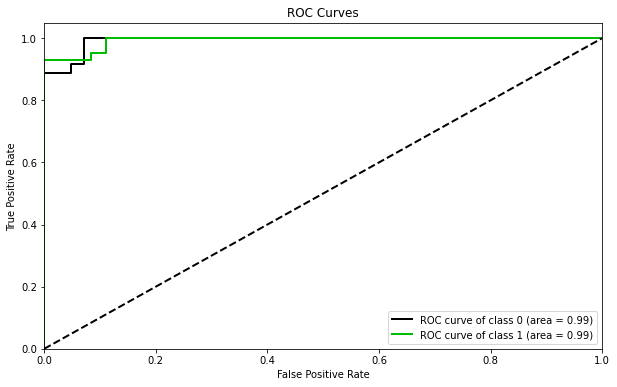


Interpreting the output of Random Forest:



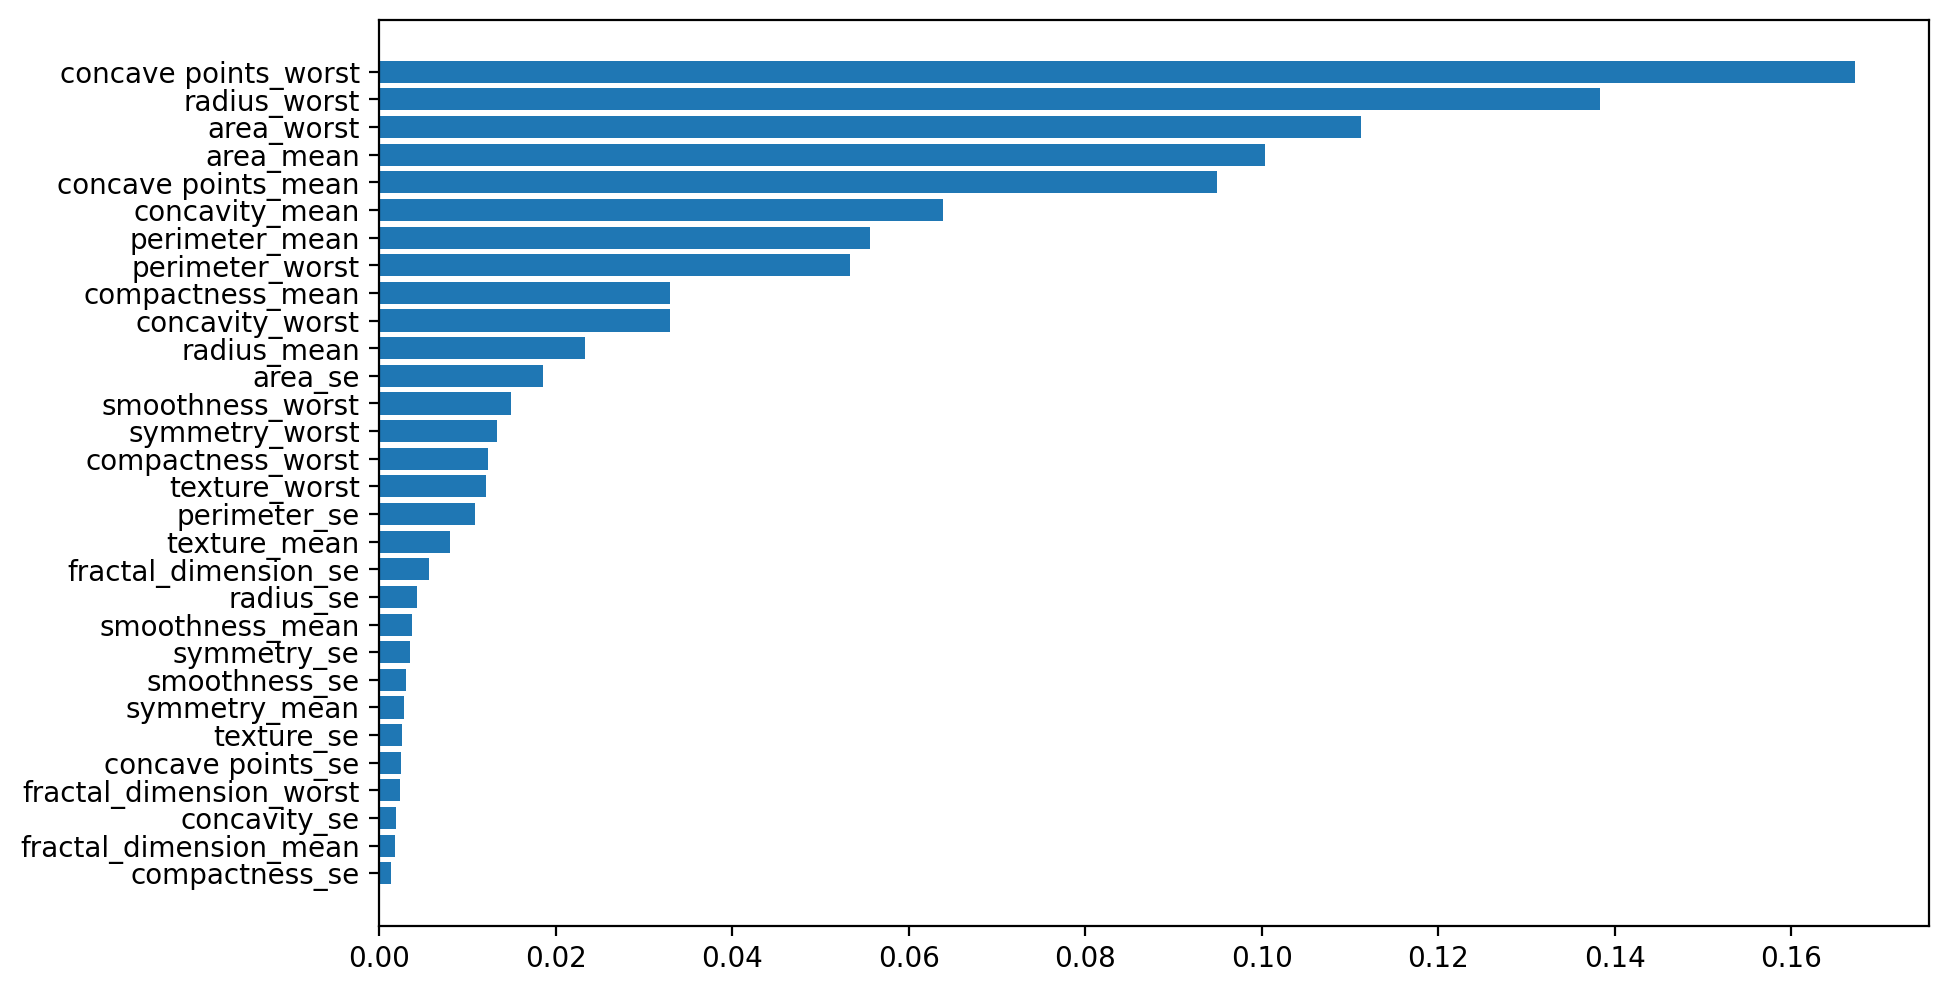

In [25]:
# model training
RF_model = RandomForestClassifier()

param_dist={'max_depth': [10, 50, 100],
            'max_features': ['sqrt', 'log2'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=10, random_state=42)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

print('\n\033[1mInterpreting the output of Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=True)
plt.figure(dpi=200)
plt.barh(rfi.index,rfi.values)
plt.show()

## Stacking: 

In [26]:
# stack various models
def get_stacking():
    # define base models
    base = list()
    base.append(('lr', LogisticRegression()))
    base.append(('knn', KNeighborsClassifier()))
    base.append(('cart', DecisionTreeClassifier()))
    base.append(('svm', SVC()))
    base.append(('bayes', GaussianNB()))
    # define meta model
    meta = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=base, final_estimator=meta, cv=5)
    return model

<<<----------------------------------- Evaluating Stacking: Super Learner ----------------------------------->>>

Accuracy = 99.1%
F1 Score = 99.1%

 Confusiton Matrix:
 [[72  0]
 [ 1 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



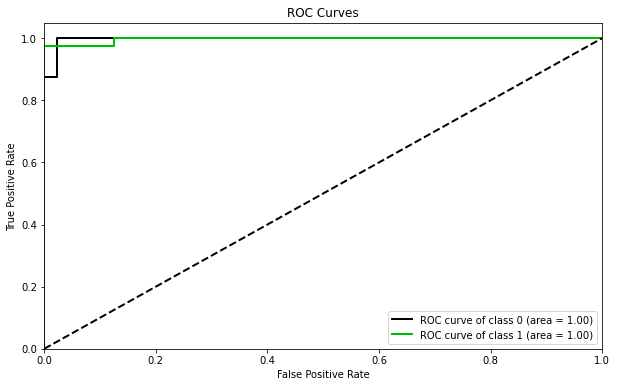

In [27]:
stack_model = get_stacking()
STACK = stack_model.fit(Train_X_std, Train_Y)
pred = STACK.predict(Test_X_std)
pred_prob = STACK.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)
# stackf=pd.DataFrame(STACK.feature_importances_, index=Train_X_std.columns).sort_values(by=0)
# plt.barh(stackf.index,stackf.values[:,0])
# plt.show()

## Boosting: XGBoost


In [28]:
# train XGBoot model

XGB_model = XGBClassifier()

param_dist = {
 "learning_rate" : [0.10, 0.15, 0.20, 0.25, 0.30],
 "max_depth" : [5, 6, 8, 10, 12, 15],
 "min_child_weight" : [1, 3, 5, 7 ],
 "gamma": [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.4, 0.5, 0.6]
}

RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=10, random_state=42)
XGB = RCV.fit(Train_X_std, Train_Y, eval_metric='logloss')
pred = XGB.predict(Test_X_std)
pred_prob = XGB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

XGB = XGB_model.fit(Train_X_std, Train_Y, eval_metric='logloss')
xgbf=pd.DataFrame(XGB.feature_importances_, index=Train_X_std.columns).sort_values(by=0)
plt.figure(dpi=200)
plt.barh(xgbf.index,xgbf.values[:,0])
plt.show()

NameError: name 'XGBClassifier' is not defined

## Results comparison

In [30]:
# plot confusion matrix of all models
def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    sns.heatmap(cm, annot=annot, fmt='')
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)], dpi=1000)
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='Reds', fmt='.0f')
        plt.title(evaluation_results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([RF, STACK, XGB])

NameError: name 'XGB' is not defined

In [32]:
evaluation_results[:2]

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Bagging: Random Forest,96.5,96.7,96.5,96.5,99.3
Stacking: Super Learner,99.1,99.1,99.1,99.1,99.7


                                              ML Algorithms Comparison                                              


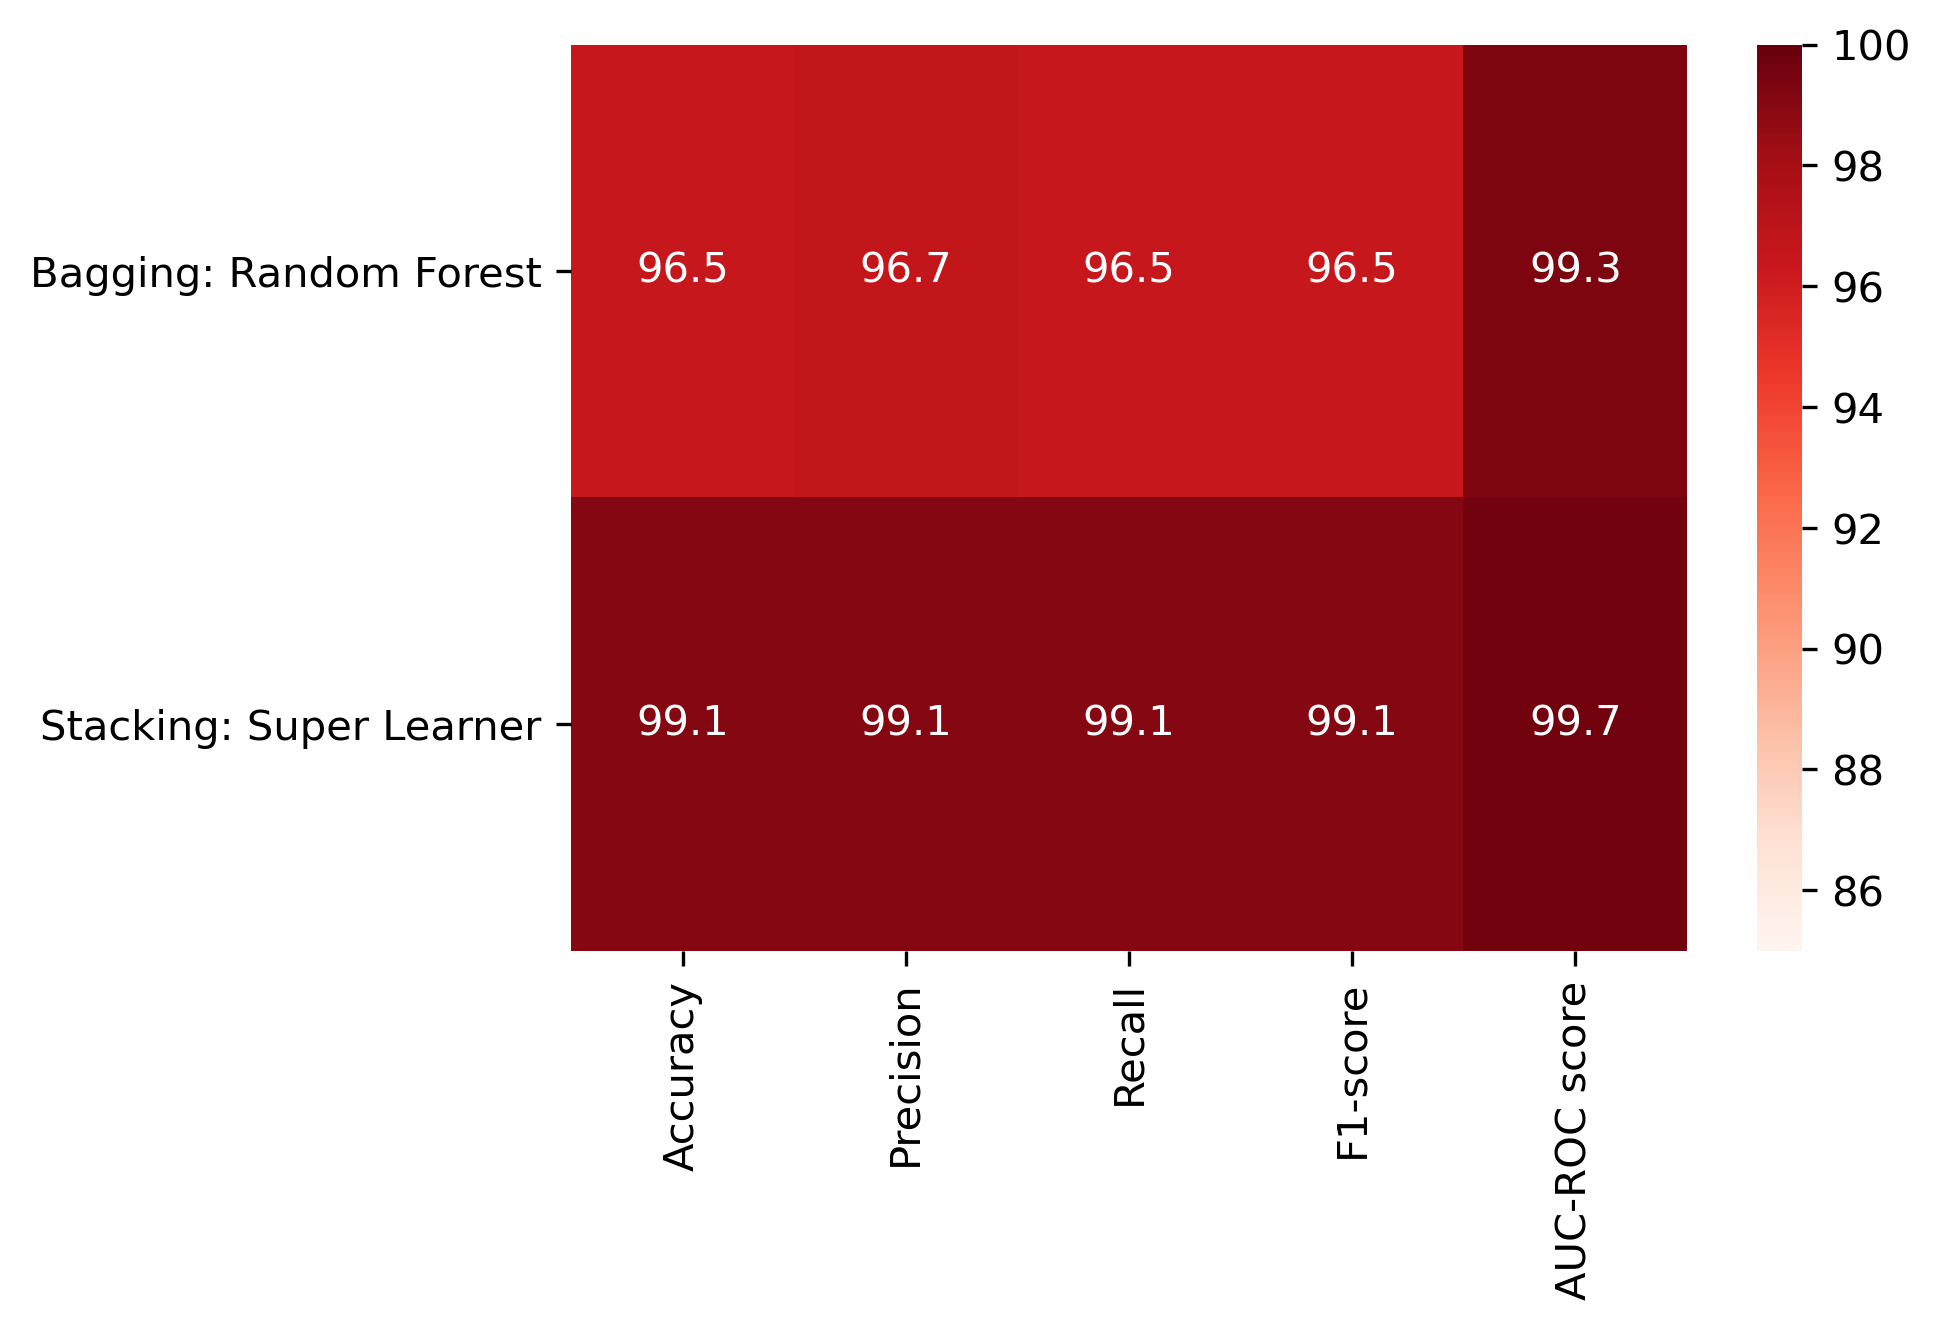

In [33]:
# results comparison

print('\033[1mML Algorithms Comparison'.center(120))
plt.figure(figsize=[6,4], dpi=300)
sns.heatmap(evaluation_results[:2], annot=True, vmin=85, vmax=100, cmap='Reds', fmt='.1f')
plt.show()

In [ ]:
# results comparison

print('\033[1mML Algorithms Comparison'.center(120))
plt.figure(figsize=[6,4], dpi=300)
sns.heatmap(evaluation_results, annot=True, vmin=85, vmax=100, cmap='Reds', fmt='.1f')
plt.show()